In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd MyDrive/dataset/
%ls

/gdrive/MyDrive/dataset
accessories.csv        covtype.csv   data.csv
Admission_Predict.csv  covtype.data  fullspecs.csv
cancer.csv             cwurData.csv  winequality-red.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Unnamed: 10,Cover_Type
0,2596,56.0,2.0,212.0,-6.0,390.0,220.0,232,148,6279,1,5
1,2590,139.0,9.0,268.0,65.0,3180.0,234.0,235,151,6225,1,5
2,2804,155.0,18.0,242.0,118.0,3090.0,238.0,238,135,6121,1,2
3,2785,45.0,2.0,153.0,-1.0,391.0,220.0,238,122,6211,1,2
4,2595,132.0,6.0,300.0,-15.0,67.0,230.0,234,150,6172,1,5


In [ ]:
df.drop('Unnamed: 10',inplace=True,axis=1)
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,56.0,2.0,212.0,-6.0,390.0,220.0,232,148,6279,5
1,2590,139.0,9.0,268.0,65.0,3180.0,234.0,235,151,6225,5


In [ ]:
df2=df.dropna(axis=1)

In [ ]:
y=df2['Cover_Type']
y.head(3)

0    5
1    5
2    2
Name: Cover_Type, dtype: int64

In [ ]:
x=df2.drop('Cover_Type',inplace=False,axis=1)
x.head(3)

,Elevation,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,232,148,6279
1,2590,235,151,6225
2,2804,238,135,6121


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression().fit(x, y)
classifier.score(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5885265708797753

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Standard = StandardScaler().fit(x)
norm_x=Standard.transform(x)
norm_x 

array([[-1.29780509,  0.43914331,  0.1429604 ,  3.24628306],
       [-1.31923485,  0.59089851,  0.22134157,  3.20550354],
       [-0.5549068 ,  0.74265371, -0.19669136,  3.1269652 ],
       ...,
       [-2.04784663,  0.89440891, -0.32732665, -0.85054846],
       [-2.05498988,  1.09674918,  0.01232511, -0.8429967 ],
       [-2.05856151,  1.04616411, -0.03992901, -0.83468976]])

In [ ]:
classifier=LogisticRegression().fit(norm_x,y)
classifier.score(norm_x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6746297838943085

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(norm_x,y, random_state=8,test_size=0.2)

In [ ]:
model=classifier.fit(x_train,y_train)
pred= classifier.predict(x_test)
print(pred)

[2 2 2 ... 1 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
print("Accuracy score:", accuracy_score(y_test,pred))

Accuracy score: 0.6736314897205752


In [ ]:
rep= classification_report(y_test,pred)
print("classification_report")
print(rep)

classification_report
              precision    recall  f1-score   support

           1       0.66      0.66      0.66     42593
           2       0.71      0.78      0.74     56372
           3       0.56      0.68      0.61      7218
           4       0.10      0.03      0.04       526
           5       0.00      0.00      0.00      1898
           6       0.21      0.04      0.06      3532
           7       0.53      0.21      0.30      4064

    accuracy                           0.67    116203
   macro avg       0.39      0.34      0.35    116203
weighted avg       0.65      0.67      0.65    116203



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix: 


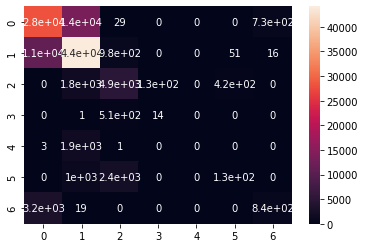

In [ ]:
res= confusion_matrix(y_test,pred)
print("Confusion matrix: ")
sns.heatmap(res, annot=True)